# PYTHON

# 1 write a python program to take a list of values as input and remove all duplicates and add them in a new list

In [13]:
list1=input("enter the list elements separated by comma").split(",")
new_list=[]
for i in list1:
    if i not in new_list:
        new_list.append(i)
print(new_list)


enter the list elements separated by comma3,5,9,7,3,5
['3', '5', '9', '7']


# 2 write a python program to extract the names of 5 people from their gmail (gmail: name12XXX89@gmail.com)and append them to a names list.

In [12]:
#anu12@gmail.com,anur13@gmail.com,anurk14@gmail.com,anurka15@gmail.com,anurkav15@gmail.com
emails=input("enter 5 emails").split(",")
names=[]
for i in emails:
    temp=i.split("@")
    names.append(temp[0])
print(names)

enter 5 emailsanu12@gmail.com,anur13@gmail.com,anurk14@gmail.com,anurka15@gmail.com,anurkav15@gmail.com
['anu12', 'anur13', 'anurk14', 'anurka15', 'anurkav15']


# 3  Mark and Tim are playing with numbers. Help them out by printing True if the number statisfies all of the following conditions or else print False


Conditions :

- The input number will be in string format.
- The numbers at the even index must be even numbers.
- The numbers at the odd index must be prime numbers.
- The index position is considered to start from 0.
- You should not use any external python libraries for this question.
Help Mark and Tim by completing the function

Example 1
number = '2342'
print(check_condition(number))
Output : True
Explanation
The numbers in index 0 and 2 are even. The numbers at index 1 and 3 are prime. Hence the function check_condition returns True

Example 2
number = '1242'
print(check_condition(number))
Output : False
Explanation
The number in index 0 is not even and hence the function check_condition returns False

Example 3
number = '2232'
print(check_condition(number))
Output : False
Example 4
number = '2229'
print(check_condition(number))
Output : False

	

In [55]:
number = input("Enter the number: ")
for i in range(len(number)):
    if i % 2 == 0:  
        if int(number[i]) % 2 != 0:  
            print(False)
            break
    else: 
        if int(number[i]) < 2: 
            temp = False
        else:
            for j in range(2, int(number[i])):
                if int(number[i]) % j == 0: 
                    temp = False
                    break
        if not temp:
            print(False)
            break
else:
    print(True)

Enter the number: 2342
True


# DATASCIENCE

# 1 create a multivariable linear regression model using appropriate data.Analyse the performance of the model using suitable regression metrics like: mean absolute error,mean squared error,r2 score etc


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
data=pd.read_csv("ParisHousing.csv")
data

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [3]:
data.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [4]:
data.shape

(10000, 17)

In [5]:
data.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [6]:
x=data.iloc[:,0:16].values
x

array([[75523,     3,     0, ...,   956,     0,     7],
       [80771,    39,     1, ...,   128,     1,     2],
       [55712,    58,     0, ...,   135,     1,     9],
       ...,
       [83841,     3,     0, ...,   345,     1,     9],
       [59036,    70,     0, ...,   339,     1,     4],
       [ 1440,    84,     0, ...,   278,     1,     6]], dtype=int64)

In [7]:
y=data.iloc[:,16].values
y

array([7559081.5, 8085989.5, 5574642.1, ..., 8390030.5, 5905107. ,
        146708.4])

In [8]:
sc=StandardScaler()
X=sc.fit_transform(x)
X

array([[ 0.89156241, -1.64351831, -1.01755405, ...,  1.53748782,
        -1.00601811,  0.63137326],
       [ 1.07395603, -0.39418009,  0.98274878, ..., -1.62237047,
         0.99401789, -0.9428096 ],
       [ 0.20303346,  0.26519286, -1.01755405, ..., -1.59565669,
         0.99401789,  1.26104641],
       ...,
       [ 1.18065352, -1.64351831, -1.01755405, ..., -0.79424336,
         0.99401789,  1.26104641],
       [ 0.31855868,  0.68163893, -1.01755405, ..., -0.81714088,
         0.99401789, -0.31313646],
       [-1.68318347,  1.16749268, -1.01755405, ..., -1.04993237,
         0.99401789,  0.31653669]])

In [9]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=0,train_size=0.8)

In [10]:
xtrain

array([[-0.99541912, -0.22066089,  0.98274878, ..., -0.51184056,
         0.99401789,  1.26104641],
       [-0.99072721,  0.78575045,  0.98274878, ..., -1.51169911,
        -1.00601811, -0.62797303],
       [ 1.49469863, -0.98414536,  0.98274878, ..., -1.4620878 ,
         0.99401789,  0.94620984],
       ...,
       [ 1.36593179,  0.50811974, -1.01755405, ...,  0.82384833,
        -1.00601811, -0.31313646],
       [ 1.56886554,  1.2716042 , -1.01755405, ..., -0.29049783,
         0.99401789,  0.00170012],
       [-1.11963307,  0.16108134, -1.01755405, ..., -0.97742355,
        -1.00601811,  0.63137326]])

In [11]:
xtest

array([[-1.24721824, -1.53940679, -1.01755405, ...,  0.40787665,
        -1.00601811, -1.25764617],
       [-1.55886526, -0.08184553, -1.01755405, ..., -0.80187587,
        -1.00601811,  0.00170012],
       [ 0.445414  , -0.39418009, -1.01755405, ...,  0.78568579,
         0.99401789,  0.94620984],
       ...,
       [ 0.41597662,  0.54282357,  0.98274878, ...,  0.00716998,
         0.99401789, -0.9428096 ],
       [ 1.34660808,  1.4451234 , -1.01755405, ..., -0.65304196,
         0.99401789, -1.57248275],
       [ 1.5689003 , -0.01243786,  0.98274878, ...,  0.01861874,
        -1.00601811,  0.31653669]])

In [12]:
ytrain

array([2132694. , 2145401.6, 9293826.3, ..., 8919647.6, 9504611.5,
       1769201.2])

In [13]:
ytest

array([1402812.2,  506461.3, 6272659.4, ..., 6189722.9, 8868266.9,
       9505478.9])

In [14]:
model=LinearRegression()

In [15]:
model.fit(xtrain,ytrain)

LinearRegression()

In [16]:
ypred=model.predict(xtest)

In [17]:
ypred

array([1405028.42333867,  504744.13542018, 6276099.29803172, ...,
       6190761.49507184, 8867268.17707434, 9508136.58849359])

# Analyze the performance of the model using matrices

In [18]:
model.score(xtest,ytest)

0.999999566785081

In [19]:
r2_score(ytest,ypred)

0.999999566785081

In [20]:
mean_squared_error(ytest,ypred)

3482280.933128576

In [21]:
mean_absolute_error(ytest,ypred)

1442.0677199314232

# 2 Apply CNN on an image data set that classifies Humans, vehicles, animals,Trees(4 class) Build your own CNN for the above problem and predict with external data(2 or 3 sample predictions)Apply any transfer learning technique and check whether the performance improves.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2 as cv
import glob

In [2]:
import pathlib

In [3]:
pic_path=pathlib.Path("C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN")

In [4]:
pic_path

WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN')

In [5]:
animals=list(pic_path.glob("Animals/*"))
human=list(pic_path.glob("human/*"))
trees=list(pic_path.glob("Trees/*"))
vehicle=list(pic_path.glob("Vehicles/*"))

In [6]:
len(animals)

208

In [7]:
len(human)

191

In [8]:
len(trees)

270

In [9]:
len(vehicle)

221

In [10]:
pic_dict={"ANIMALS":animals,"HUMAN":human,"TREES":trees,"VEHICLES":vehicle}

In [11]:
pic_class={"ANIMALS":0,"HUMAN":1,"TREES":2,"VEHICLES":3}

In [12]:
pic_dict

{'ANIMALS': [WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Animals/1633802583762_Indian Ringneck for sale.jpg'),
  WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Animals/1633802583996_Rottweiler Puppy for sale.jpg'),
  WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Animals/1633802584211_Rabbit for sale.jpg'),
  WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Animals/1633802584412_Cokatail bird for sale.jpg'),
  WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Animals/1633802584634_Apple Konda Pigeon for sale.jpg'),
  WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Animals/1633802584820_Racing homer pigeon for sale.jpg'),
  WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Animals/1633802585026_├á┬╖┬Ç├á┬╖┬Æ├á┬╢┬Ü├á┬╖┬Æ├á┬╢┬▒├á┬╖┬Æ├á┬╢┬╕├á┬╢┬º for sale.jpg'),
  WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Animals/1633802585233_Koi carf for sale.jpg'),
  WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Animals/1633802585380

In [13]:
import cv2 as cv
import os

x = []
y = []

for i in pic_dict:
    pic_path_list = pic_dict[i]
    print(pic_path_list)
    for path in pic_path_list:
        if os.path.exists(path):  
            img = cv.imread(str(path))
            if img is not None: 
                img = cv.resize(img, (100, 100))
                img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
                img = img / 255
                x.append(img)
                y.append(pic_class[i])
            else:
                print(f"Failed to load image: {path}")
        else:
            print(f"File not found: {path}")


[WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Animals/1633802583762_Indian Ringneck for sale.jpg'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Animals/1633802583996_Rottweiler Puppy for sale.jpg'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Animals/1633802584211_Rabbit for sale.jpg'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Animals/1633802584412_Cokatail bird for sale.jpg'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Animals/1633802584634_Apple Konda Pigeon for sale.jpg'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Animals/1633802584820_Racing homer pigeon for sale.jpg'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Animals/1633802585026_├á┬╖┬Ç├á┬╖┬Æ├á┬╢┬Ü├á┬╖┬Æ├á┬╢┬▒├á┬╖┬Æ├á┬╢┬╕├á┬╢┬º for sale.jpg'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Animals/1633802585233_Koi carf for sale.jpg'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Animals/1633802585380_White Parrot Fish for sale.

Failed to load image: C:\Users\hp\Desktop\PYTHON TASKS\Data-CNN\Animals\1633802585026_├á┬╖┬Ç├á┬╖┬Æ├á┬╢┬Ü├á┬╖┬Æ├á┬╢┬▒├á┬╖┬Æ├á┬╢┬╕├á┬╢┬º for sale.jpg
Failed to load image: C:\Users\hp\Desktop\PYTHON TASKS\Data-CNN\Animals\1633802586143_├á┬╖┬Ç├á┬╢┬º├á┬╖┬ö ├á┬╢┬Ü├á┬╖┬ö├á┬╢┬╗├á┬╖┬ö├á┬╢┬╜├á┬╖┬è├á┬╢┬╜├á┬╢┬▒├á┬╖┬è for sale.jpg
Failed to load image: C:\Users\hp\Desktop\PYTHON TASKS\Data-CNN\Animals\1633802587851_├á┬«┬¿├á┬«┬╛├á┬«┬ƒ├á┬»┬ì├á┬«┬ƒ├á┬»┬ü ├á┬«┬ò├á┬»┬ï├á┬«┬┤├á┬«┬┐ for sale.jpg
Failed to load image: C:\Users\hp\Desktop\PYTHON TASKS\Data-CNN\Animals\1633802609493_├á┬╢┬┤├á┬╢┬╗├á┬╖┬Ç├á┬╖┬Æ├á┬╢┬║├á┬╢┬▒├á┬╖┬è for sale.jpg
Failed to load image: C:\Users\hp\Desktop\PYTHON TASKS\Data-CNN\Animals\1633802632970_Guinea pigs ├á┬╢┬£├á┬╖┬Æ├á┬╢┬▒├á┬╖┬Æ ├á┬╢┬┤├á┬╖┬Æ├á┬╢┬£├á┬╖┬è for sale.jpg
Failed to load image: C:\Users\hp\Desktop\PYTHON TASKS\Data-CNN\Animals\1633802633520_├á┬╢┬┤├á┬╢┬╗├á┬╖┬Ç├á┬╖┬Æ├á┬╢┬║├á┬╖┬Å├á┬╢┬▒├á┬╖┬è for sale.jpg
Failed to load image: C:\Users\hp\Desktop\PYTHON TASKS\Data-CNN\Ani

[WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Trees/1004.jpg'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Trees/1017.jpg'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Trees/1024.jpg'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Trees/1025.jpg'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Trees/1034.jpg'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Trees/1050.jpg'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Trees/1063.jpg'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Trees/1074.jpg'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Trees/1079.jpg'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Trees/1080.jpg'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Trees/1096.jpg'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Trees/1105.jpg'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Trees/1106.jpg'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data

[WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Vehicles/1.png'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Vehicles/10.png'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Vehicles/101.png'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Vehicles/102.png'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Vehicles/103.png'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Vehicles/104.png'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Vehicles/105.png'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Vehicles/106.png'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Vehicles/107.png'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Vehicles/108.png'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Vehicles/109.png'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Vehicles/11.png'), WindowsPath('C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Vehicles/110.png'), WindowsPath('C:/Users/hp/Des

In [14]:
len(x)

879

In [15]:
len(y)

879

In [16]:
x = np.expand_dims(x, axis=-1)
x = np.repeat(x, 3, axis=-1)

In [17]:
x=np.array(x)
y=np.array(y)

In [18]:
x.shape

(879, 100, 100, 3)

In [19]:
y.shape

(879,)

In [20]:
x

array([[[[0.25490196, 0.25490196, 0.25490196],
         [0.25882353, 0.25882353, 0.25882353],
         [0.28627451, 0.28627451, 0.28627451],
         ...,
         [0.57254902, 0.57254902, 0.57254902],
         [0.62352941, 0.62352941, 0.62352941],
         [0.88627451, 0.88627451, 0.88627451]],

        [[0.24705882, 0.24705882, 0.24705882],
         [0.22745098, 0.22745098, 0.22745098],
         [0.26666667, 0.26666667, 0.26666667],
         ...,
         [0.67058824, 0.67058824, 0.67058824],
         [0.91764706, 0.91764706, 0.91764706],
         [0.84705882, 0.84705882, 0.84705882]],

        [[0.22352941, 0.22352941, 0.22352941],
         [0.2       , 0.2       , 0.2       ],
         [0.23137255, 0.23137255, 0.23137255],
         ...,
         [0.81568627, 0.81568627, 0.81568627],
         [0.77254902, 0.77254902, 0.77254902],
         [0.67058824, 0.67058824, 0.67058824]],

        ...,

        [[0.62745098, 0.62745098, 0.62745098],
         [0.63921569, 0.63921569, 0.63921569]

In [21]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [30]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=1)

In [32]:
len(xtrain)

615

In [33]:
len(xtest)

264

In [34]:
len(ytrain)

615

In [35]:
len(ytest)

264

In [36]:
model=Sequential()
model.add(Conv2D(filters=100,kernel_size=(3,3),input_shape=(100,100,3),padding="valid",strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=80,kernel_size=(3,3),padding="valid",strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=30,kernel_size=(3,3),padding="valid",strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(100,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(50,activation="relu"))

model.add(Dense(4,activation="softmax"))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 100)       2800      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 49, 49, 100)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 80)        72080     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 80)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 30)        21630     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 30)      

In [38]:
model.compile(optimizer="adamax",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
hist=model.fit(xtrain,ytrain,epochs=10,batch_size=4,validation_data=(xtest,ytest))

Epoch 1/10
154/154 [==============================] - 33s 194ms/step - loss: 1.1149 - accuracy: 0.4537 - val_loss: 0.9357 - val_accuracy: 0.6364
Epoch 2/10
154/154 [==============================] - 29s 191ms/step - loss: 0.7184 - accuracy: 0.7122 - val_loss: 0.9668 - val_accuracy: 0.5758
Epoch 3/10
154/154 [==============================] - 30s 193ms/step - loss: 0.5173 - accuracy: 0.7951 - val_loss: 0.4577 - val_accuracy: 0.8409
Epoch 4/10
154/154 [==============================] - 30s 193ms/step - loss: 0.4040 - accuracy: 0.8488 - val_loss: 0.4522 - val_accuracy: 0.7992
Epoch 5/10
154/154 [==============================] - 29s 191ms/step - loss: 0.3646 - accuracy: 0.8585 - val_loss: 0.4247 - val_accuracy: 0.8561
Epoch 6/10
154/154 [==============================] - 30s 193ms/step - loss: 0.3250 - accuracy: 0.8878 - val_loss: 0.2964 - val_accuracy: 0.8939
Epoch 7/10
154/154 [==============================] - 29s 191ms/step - loss: 0.2507 - accuracy: 0.9041 - val_loss: 0.3851 - val_ac

In [39]:
model.evaluate(xtest,ytest)

9/9 [==============================] - 3s 282ms/step - loss: 0.4234 - accuracy: 0.8712


[0.4234485626220703, 0.8712121248245239]

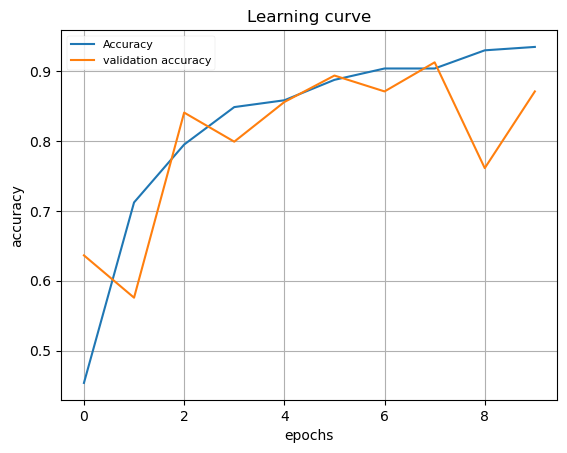

In [40]:
history=hist.history
plt.title("Learning curve")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(history["accuracy"],label=("Accuracy"))
plt.plot(history["val_accuracy"],label=("validation accuracy"))
plt.grid(True)
plt.style.use("seaborn-paper")
plt.legend()
plt.show()

In [41]:
ypred=model.predict(xtest)

9/9 [==============================] - 3s 284ms/step


In [42]:
ypred

array([[6.7728424e-01, 2.9673836e-01, 8.1480695e-03, 1.7829390e-02],
       [2.7360706e-05, 3.0219543e-04, 9.9967039e-01, 1.1533378e-08],
       [1.7818781e-02, 9.8210126e-01, 2.2614171e-05, 5.7308949e-05],
       ...,
       [9.4119793e-01, 5.6756653e-02, 9.7962846e-05, 1.9475133e-03],
       [2.4108556e-03, 4.4264318e-04, 1.6170352e-03, 9.9552947e-01],
       [3.3316623e-02, 1.4583712e-02, 9.5207691e-01, 2.2757265e-05]],
      dtype=float32)

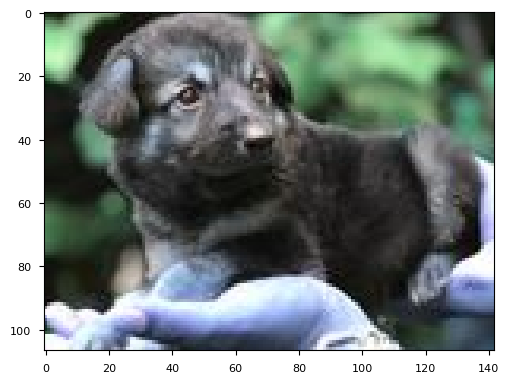

In [43]:
img=cv.imread("C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/Animals/1633802635025_Lion Shepherd Puppies for sale.jpg")
plt.imshow(img)

In [44]:
img=cv.resize(img,(100,100))
img

array([[[ 18,  36,  15],
        [ 21,  37,  16],
        [ 29,  41,  21],
        ...,
        [ 22,  29,  22],
        [ 23,  29,  23],
        [ 23,  27,  22]],

       [[ 37,  60,  36],
        [ 34,  54,  30],
        [ 31,  47,  24],
        ...,
        [ 22,  29,  22],
        [ 23,  28,  22],
        [ 23,  27,  22]],

       [[ 70, 102,  71],
        [ 66,  95,  65],
        [ 56,  80,  51],
        ...,
        [ 26,  30,  24],
        [ 25,  28,  22],
        [ 24,  26,  20]],

       ...,

       [[246, 254, 249],
        [246, 253, 252],
        [249, 253, 255],
        ...,
        [ 50,  66,  82],
        [ 48,  67,  84],
        [ 45,  67,  83]],

       [[250, 249, 254],
        [252, 251, 253],
        [252, 255, 255],
        ...,
        [ 53,  71,  88],
        [ 52,  73,  91],
        [ 49,  74,  91]],

       [[253, 245, 255],
        [254, 251, 254],
        [255, 255, 251],
        ...,
        [ 57,  77,  94],
        [ 56,  79,  97],
        [ 52,  79,  99]]

In [45]:
pred_img=img.reshape(1,100,100,3)
pred_img

array([[[[ 18,  36,  15],
         [ 21,  37,  16],
         [ 29,  41,  21],
         ...,
         [ 22,  29,  22],
         [ 23,  29,  23],
         [ 23,  27,  22]],

        [[ 37,  60,  36],
         [ 34,  54,  30],
         [ 31,  47,  24],
         ...,
         [ 22,  29,  22],
         [ 23,  28,  22],
         [ 23,  27,  22]],

        [[ 70, 102,  71],
         [ 66,  95,  65],
         [ 56,  80,  51],
         ...,
         [ 26,  30,  24],
         [ 25,  28,  22],
         [ 24,  26,  20]],

        ...,

        [[246, 254, 249],
         [246, 253, 252],
         [249, 253, 255],
         ...,
         [ 50,  66,  82],
         [ 48,  67,  84],
         [ 45,  67,  83]],

        [[250, 249, 254],
         [252, 251, 253],
         [252, 255, 255],
         ...,
         [ 53,  71,  88],
         [ 52,  73,  91],
         [ 49,  74,  91]],

        [[253, 245, 255],
         [254, 251, 254],
         [255, 255, 251],
         ...,
         [ 57,  77,  94],
        

In [46]:
pred=model.predict(pred_img)

1/1 [==============================] - 0s 199ms/step


In [47]:
pred

array([[1., 0., 0., 0.]], dtype=float32)

In [48]:
np.argmax(pred)

0

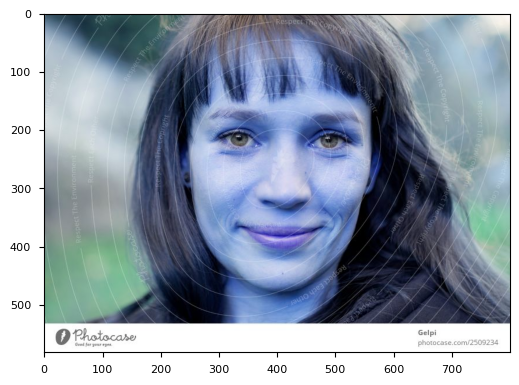

In [49]:
img=cv.imread("C:/Users/hp/Desktop/PYTHON TASKS/Data-CNN/human/2509234-beautiful-brunette-woman-lifestyle-happy-face-relaxation-photocase-stock-photo-large.jpeg")
plt.imshow(img)

In [50]:
img=cv.resize(img,(100,100))
img

array([[[ 81, 108, 122],
        [ 56,  83,  97],
        [ 50,  78,  93],
        ...,
        [248, 245, 240],
        [251, 248, 244],
        [255, 252, 251]],

       [[ 78, 105, 125],
        [ 66,  93, 112],
        [ 52,  82, 100],
        ...,
        [247, 244, 239],
        [248, 245, 237],
        [253, 248, 245]],

       [[ 90, 118, 142],
        [ 80, 108, 132],
        [ 67,  98, 118],
        ...,
        [244, 241, 235],
        [246, 241, 232],
        [249, 243, 238]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [203, 203, 203],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [51]:
pred_img=img.reshape(1,100,100,3)
pred_img

array([[[[ 81, 108, 122],
         [ 56,  83,  97],
         [ 50,  78,  93],
         ...,
         [248, 245, 240],
         [251, 248, 244],
         [255, 252, 251]],

        [[ 78, 105, 125],
         [ 66,  93, 112],
         [ 52,  82, 100],
         ...,
         [247, 244, 239],
         [248, 245, 237],
         [253, 248, 245]],

        [[ 90, 118, 142],
         [ 80, 108, 132],
         [ 67,  98, 118],
         ...,
         [244, 241, 235],
         [246, 241, 232],
         [249, 243, 238]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [254, 254, 254],
         ...,
         [203, 203, 203],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [254, 254, 254],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [52]:
pred=model.predict(pred_img)

1/1 [==============================] - 0s 61ms/step


In [53]:
pred

array([[0., 1., 0., 0.]], dtype=float32)

In [54]:
np.argmax(pred)

1

# 3 Get a data with atleast 50,000 rows with target variable containing atleast 5 classes(classification problem)
	a) Do all the necessary data preprocessing steps using pandas
	b) Perform EDA and draw some basic conclusions from the data
	c) Visualize some basic relations in the data using appropriate graphical charts.
	d) Apply any two MACHINE LEARNING algorithm and verify the model performance using suitable metrics.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [11]:
data1=pd.read_csv("star_classification.csv")
data1

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [14]:
data1.shape

(100000, 18)

In [15]:
data1.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

# COLUMNS
1)obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS

2)alpha = Right Ascension angle (at J2000 epoch)

3)delta = Declination angle (at J2000 epoch)

4)u = Ultraviolet filter in the photometric system

5)g = Green filter in the photometric system

6)r = Red filter in the photometric system

7)i = Near Infrared filter in the photometric system

8)z = Infrared filter in the photometric system

9)run_ID = Run Number used to identify the specific scan

10)rereun_ID = Rerun Number to specify how the image was processed

11)cam_col = Camera column to identify the scanline within the run

12)field_ID = Field number to identify each field

13)spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same 
spec_obj_ID must share the output class)

14)class = object class (galaxy, star or quasar object)

15)redshift = redshift value based on the increase in wavelength

16)plate = plate ID, identifies each plate in SDSS

17)MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken

18)fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

In [19]:
data1.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [16]:
data1.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [22]:
data1.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [20]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [23]:
data1["class"].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

# Data Visualization

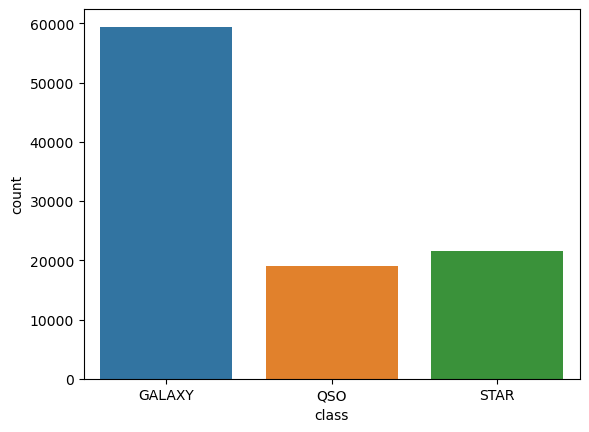

In [25]:
#countplot of class column

sb.countplot(x = data1['class'])
plt.show()

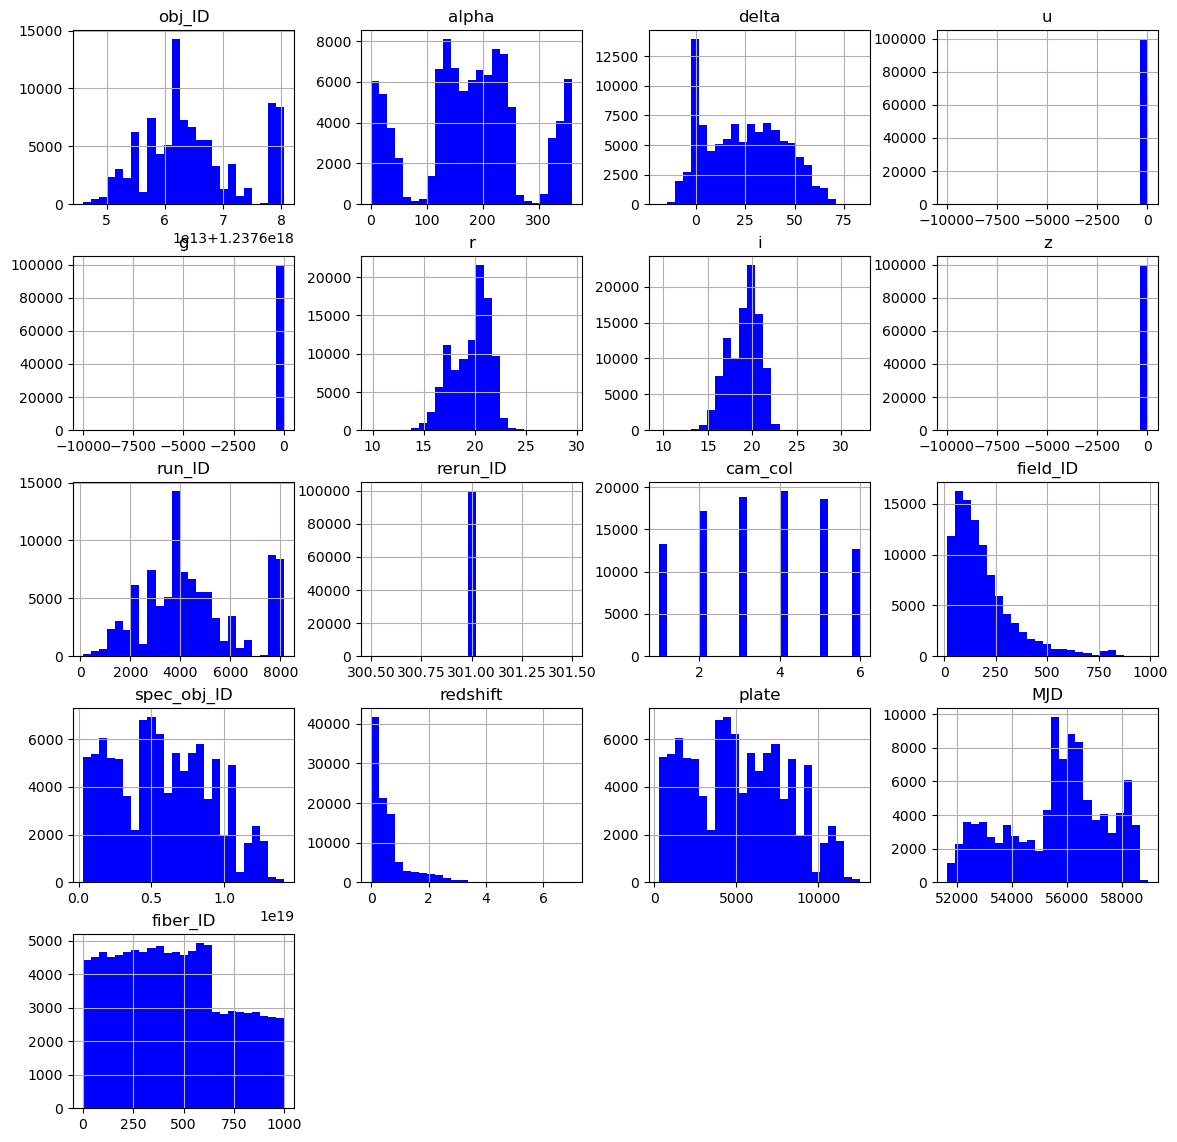

In [27]:
#plot all variables in histogram

data1.hist(bins =25 , figsize= (14,14), color="blue")
plt.show()


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


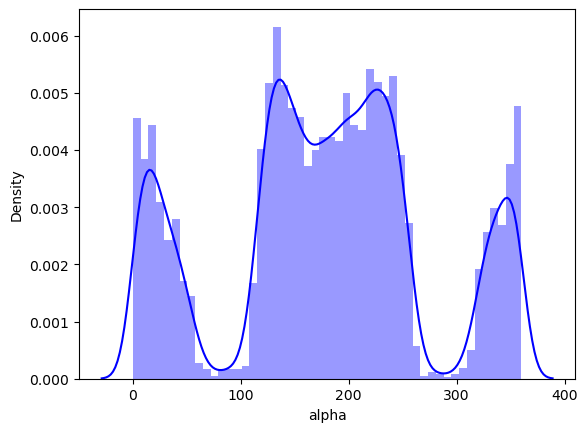

In [29]:
sb.distplot(data1['alpha'], color="blue")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


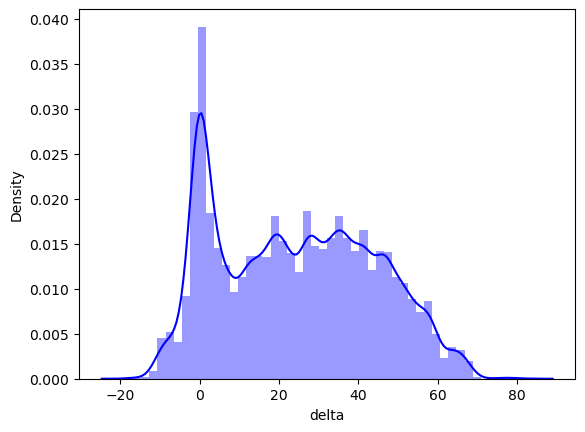

In [30]:
sb.distplot(data1['delta'], color="blue")
plt.show()

<AxesSubplot:>

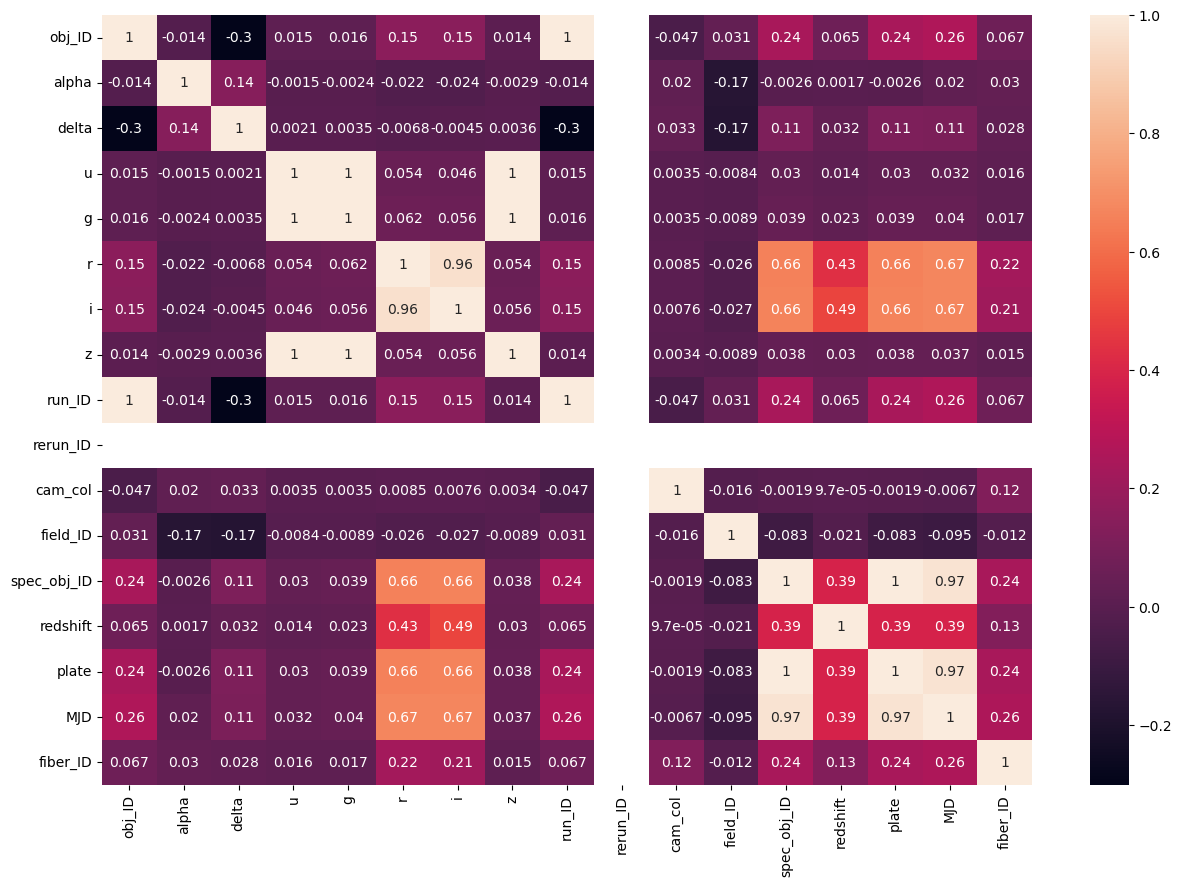

In [36]:
#Heatmap for expressing correlation

plt.figure(figsize=(15,10))
corr = data1.corr()
sb.heatmap(corr,annot=True)

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [46]:
label= LabelEncoder()
data1['class'] = label.fit_transform(data1['class'])

In [47]:
x=data1.drop(columns=['class'])
x.values

array([[1.23766096e+18, 1.35689107e+02, 3.24946318e+01, ...,
        5.81200000e+03, 5.63540000e+04, 1.71000000e+02],
       [1.23766488e+18, 1.44826101e+02, 3.12741849e+01, ...,
        1.04450000e+04, 5.81580000e+04, 4.27000000e+02],
       [1.23766096e+18, 1.42188790e+02, 3.55824442e+01, ...,
        4.57600000e+03, 5.55920000e+04, 2.99000000e+02],
       ...,
       [1.23766830e+18, 2.24587407e+02, 1.57007074e+01, ...,
        2.76400000e+03, 5.45350000e+04, 7.40000000e+01],
       [1.23766115e+18, 2.12268621e+02, 4.66603653e+01, ...,
        6.75100000e+03, 5.63680000e+04, 4.70000000e+02],
       [1.23766115e+18, 1.96896053e+02, 4.94646428e+01, ...,
        7.41000000e+03, 5.71040000e+04, 8.51000000e+02]])

In [48]:
y=data1["class"]
y.values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
sc=StandardScaler()
X=sc.fit_transform(x)
X

array([[-0.44563362, -0.43460358,  0.42552871, ...,  0.22863291,
         0.42320321, -1.02134224],
       [ 0.01873981, -0.33992143,  0.36340227, ...,  1.79792394,
         1.42072864, -0.0818825 ],
       [-0.4456333 , -0.36725058,  0.58271274, ..., -0.19002535,
         0.00185377, -0.55161237],
       ...,
       [ 0.42381919,  0.48660555, -0.4293603 , ..., -0.80378648,
        -0.58261651, -1.37730941],
       [-0.42311121,  0.35895206,  1.14663054, ...,  0.54669125,
         0.43094454,  0.07591737],
       [-0.42311176,  0.19965373,  1.28938133, ...,  0.76990791,
         0.83791722,  1.47409769]])

In [51]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=0,train_size=0.8)

In [52]:
xtrain

array([[ 0.09667624,  0.73595662, -0.35205868, ..., -0.36345013,
        -0.12311338, -1.20116071],
       [-0.29090589,  0.52233032, -0.97823036, ..., -1.11913506,
        -0.56823976, -1.05437013],
       [ 0.6797034 , -1.42783966,  0.13421824, ..., -0.91217697,
        -0.83310377, -1.15712353],
       ...,
       [-0.14724807,  1.62926529, -1.224641  , ..., -1.35251333,
        -1.29979527, -0.06353368],
       [-1.61804744,  0.24031772,  2.09405488, ..., -1.53576099,
        -1.95338455, -0.31307767],
       [ 0.0482001 ,  0.31495564,  0.45186166, ..., -0.43221034,
        -0.17398497,  0.6227123 ]])

In [53]:
xtest

array([[ 1.75178982, -1.70429307, -0.19373021, ...,  0.84070045,
         0.72511501,  1.34932569],
       [-0.29592937,  0.23775296,  0.74012801, ...,  1.2559715 ,
         1.42128159, -0.09656156],
       [-0.4460157 , -0.64633003, -0.23579207, ...,  1.29323073,
         1.02979157, -0.16261733],
       ...,
       [-1.56212456,  0.67338263,  1.49749399, ..., -1.52966403,
        -1.9539375 ,  0.42454501],
       [-1.15813019,  0.61423504,  1.60033615, ..., -1.53101891,
        -1.94453732, -1.43602565],
       [ 0.86560451,  1.31617343,  1.80545239, ..., -0.87153054,
        -0.72638403, -1.41033729]])

In [54]:
ytrain

10382    0
73171    2
30938    2
99310    1
58959    1
        ..
21243    0
45891    0
42613    2
43567    0
68268    0
Name: class, Length: 80000, dtype: int64

In [55]:
ytest

3582     0
60498    1
53227    0
21333    0
3885     0
        ..
60116    0
2415     0
43763    0
71345    0
77687    2
Name: class, Length: 20000, dtype: int64

# Model Building 

Two Machine Learning Algorithms 

1) Logistic regression

2) Decision tree classification

In [56]:
lg_model=LogisticRegression()

In [57]:
lg_model.fit(xtrain,ytrain)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
ypred=lg_model.predict(xtest)

In [60]:
ypred

array([0, 1, 0, ..., 0, 0, 2], dtype=int64)

In [77]:
cm=confusion_matrix(ytest,ypred)
cm

array([[11422,   189,   240],
       [  471,  3361,     3],
       [    2,     6,  4306]], dtype=int64)

In [61]:
ac=accuracy_score(ytest,ypred)
ac

0.95445

In [72]:
d_model=DecisionTreeClassifier()

In [73]:
d_model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [74]:
ypred2=d_model.predict(xtest)

In [75]:
ypred2

array([0, 1, 0, ..., 0, 0, 2], dtype=int64)

In [80]:
cm2=confusion_matrix(ytest,ypred2)
cm2

array([[11487,   352,    12],
       [  313,  3522,     0],
       [   28,     0,  4286]], dtype=int64)

In [81]:
ac2=accuracy_score(ytest,ypred2)
ac2

0.96475